In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import cv2

%matplotlib inline 

In [2]:
df_all = pd.read_pickle(os.path.join(os.getcwd(), 'input\LSWMD.pkl'))
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
waferMap          811457 non-null object
dieSize           811457 non-null float64
lotName           811457 non-null object
waferIndex        811457 non-null float64
trianTestLabel    811457 non-null object
failureType       811457 non-null object
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [3]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
waferMap          811457 non-null object
dieSize           811457 non-null float64
lotName           811457 non-null object
waferIndex        811457 non-null float64
trianTestLabel    811457 non-null object
failureType       811457 non-null object
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [4]:
df_all.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [5]:
df_all.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


## Добавим разметку паттернов и их количество для каждой вафли 

In [6]:
df_all['failureNum'] = df_all.failureType
df_all['trainTestNum'] = df_all.trianTestLabel

mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,
              'Edge-Ring':3,'Loc':4,'Random':5,
              'Scratch':6,'Near-full':7,'none':8}

mapping_traintest = {'Training':0, 'Test':1}

df_all = df_all.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

C:\Users\user\Anaconda3\envs\neuralnets\lib\site-packages\pandas\core\internals.py:5152: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(a, b)
C:\Users\user\Anaconda3\envs\neuralnets\lib\site-packages\pandas\core\missing.py:51: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


## Разделим датасет

In [7]:
df_withlabel = df_all[(df_all['failureNum'] >= 0) & df_all['failureNum'] <=8]
df_withlabel = df_withlabel.reset_index()

df_withpattern = df_all[(df_all['failureNum'] >= 0) & (df_all['failureNum'] <= 7)]
df_withpattern = df_withpattern.reset_index()

df_nopattern = df_all[(df_all['failureNum'] == 8)]

df_withlabel.shape, df_withpattern.shape, df_nopattern.shape

((811457, 9), (25519, 9), (147431, 8))

## Посмотрим на статистику данных

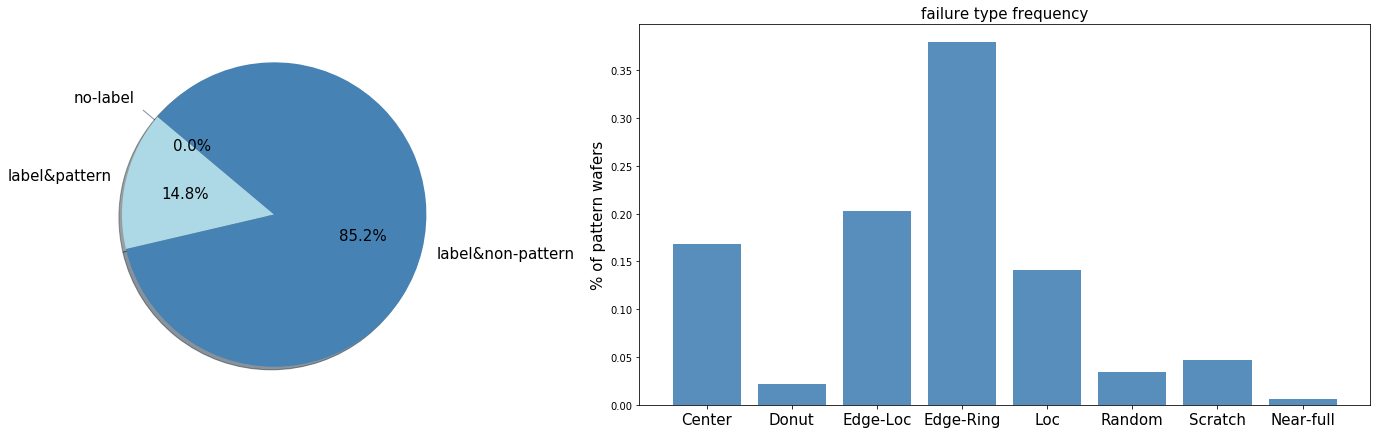

In [8]:
from matplotlib import gridspec

fig = plt.figure(figsize=(24, 7)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.5]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[df_all.shape[0] - df_withlabel.shape[0], 
           df_withpattern.shape[0], df_nopattern.shape[0]]

colors = ['royalblue', 'lightblue', 'steelblue']
explode = (0.1, 0, 0)
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(no_wafers, explode=explode, 
        labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140,
       textprops={'fontsize': 15})

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut',
           'Edge-Loc','Edge-Ring','Loc',
           'Random','Scratch','Near-full']

ax2.bar(uni_pattern[0], uni_pattern[1] / df_withpattern.shape[0],
            color='steelblue', align='center', alpha=0.9)
ax2.set_title("failure type frequency", fontsize=15)
ax2.set_ylabel("% of pattern wafers", fontsize=15)
ax2.set_xticklabels(labels2, fontsize=15)

plt.show();

## Нарисуем вафли 

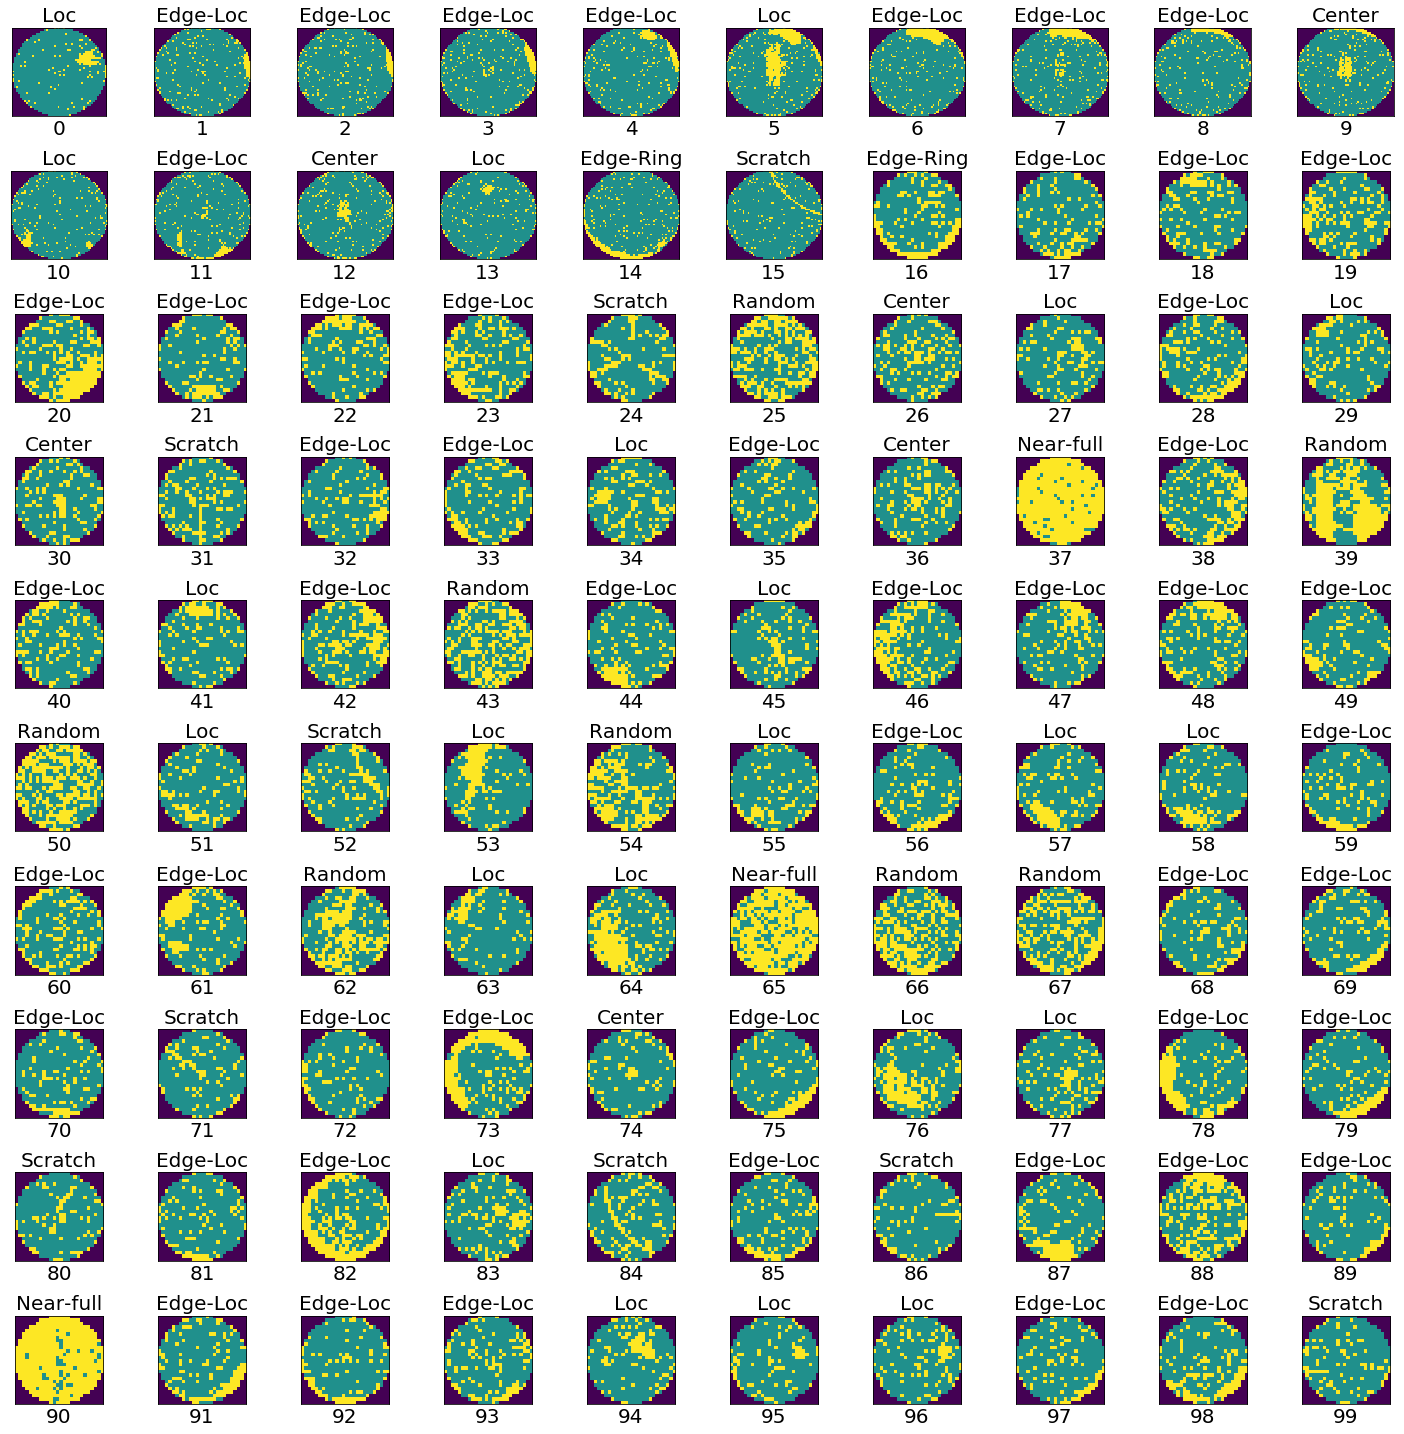

In [9]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(20, 20))
ax = ax.ravel(order='C')
for i in range(100):
    img = df_withpattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[i][0][0], fontsize=20)
    ax[i].set_xlabel(df_withpattern.index[i], fontsize=20)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
plt.tight_layout()
plt.show() 

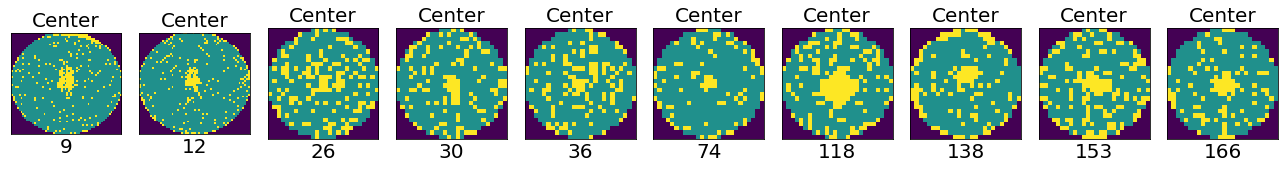

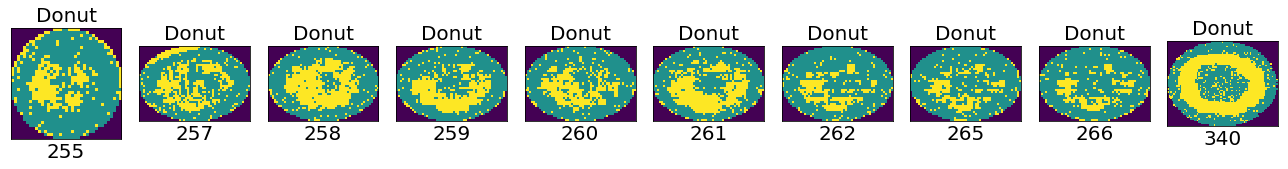

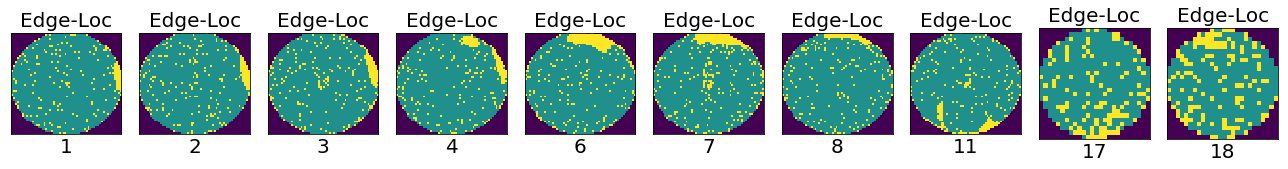

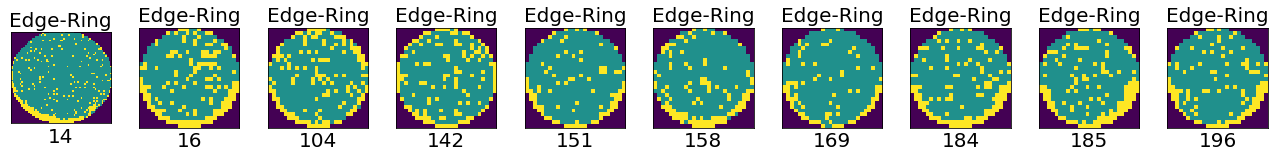

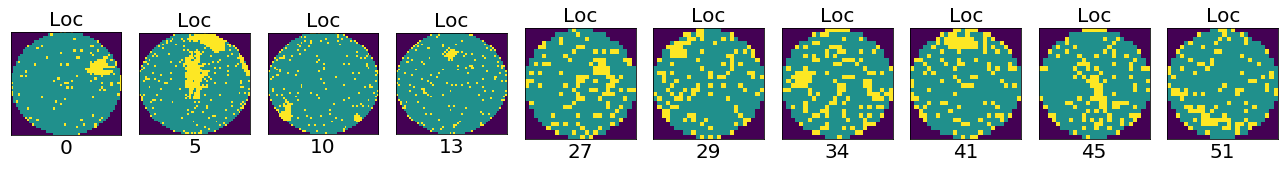

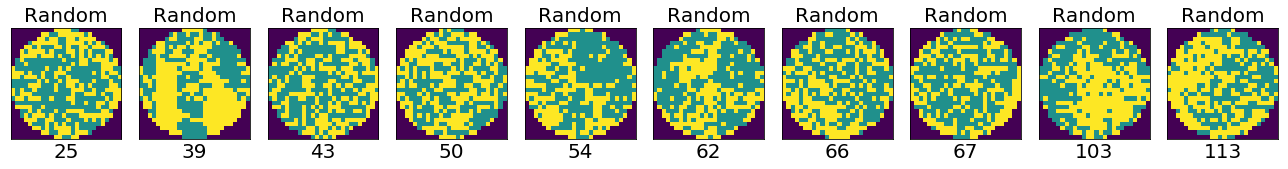

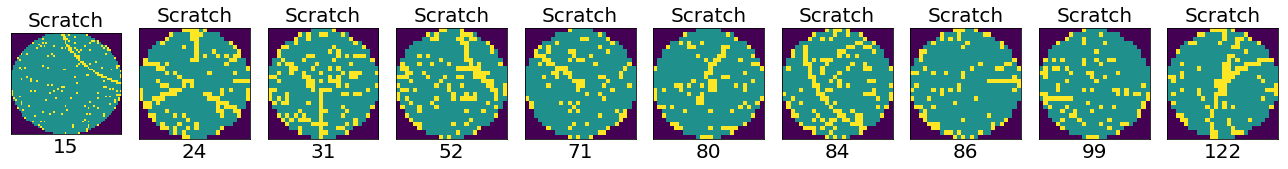

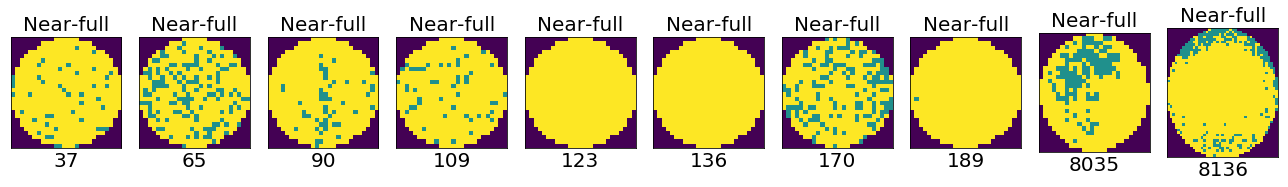

In [10]:
x = [0,1,2,3,4,5,6,7]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

for k in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
    ax = ax.ravel(order='C')
    for j in [k]:
        img = df_withpattern.waferMap[df_withpattern.failureType==labels2[j]]
        for i in range(10):
            ax[i].imshow(img[img.index[i]])
            ax[i].set_title(df_withpattern.failureType[img.index[i]][0][0], fontsize=20)
            ax[i].set_xlabel(df_withpattern.index[img.index[i]], fontsize=20)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.tight_layout()
    plt.show() 

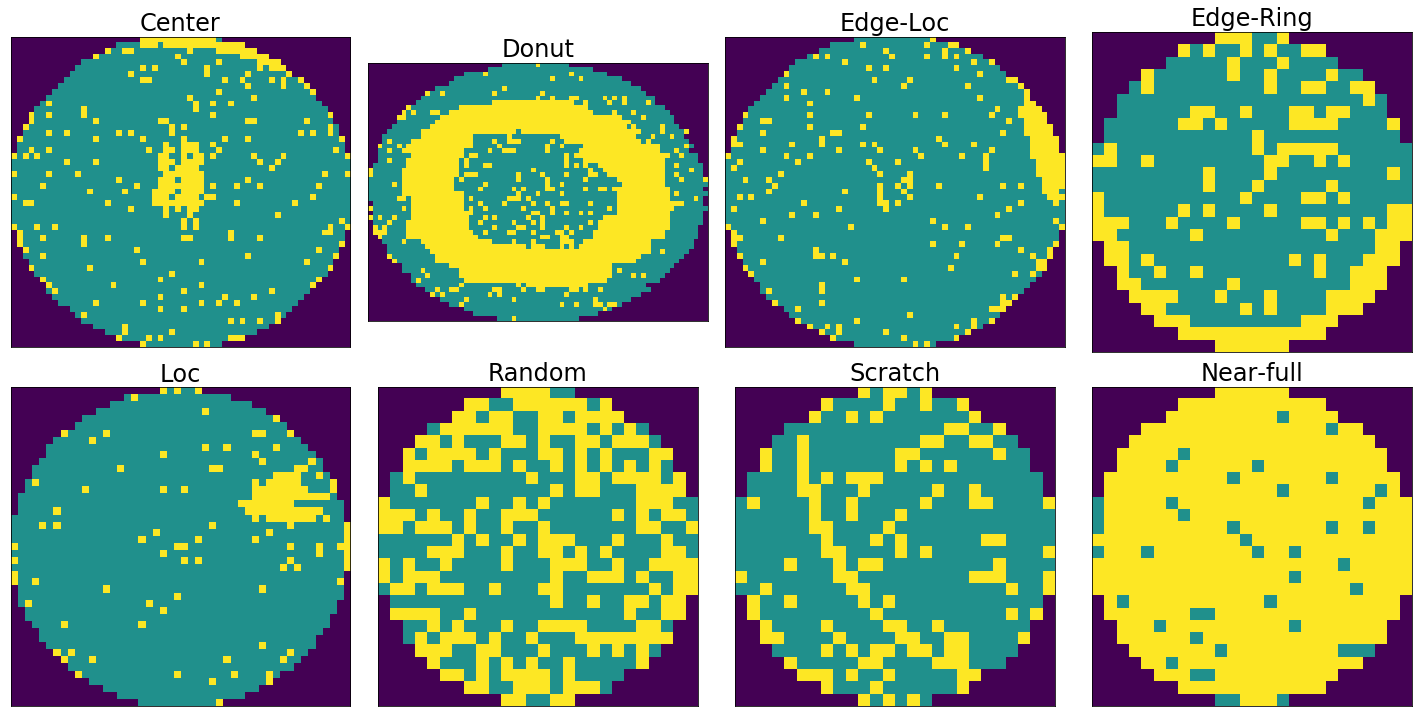

In [11]:
x = [9,340, 3, 16, 0, 25, 84, 37]

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_withpattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

## Модель 

In [12]:
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from keras.utils import np_utils

Using TensorFlow backend.


In [13]:
EPOCHS = 75
INIT_LR = 1e-3
IMAGE_DIMS = (96 , 96 , 1)
BATCH_SIZE = 52

## Reshape всех карт

### Сделаем sample 

In [14]:
%%time
df = df_withpattern.sample(20000)
df['waferMap'] = df['waferMap'].map(lambda waf_map: 
                                    cv2.resize(waf_map, 
                                               dsize=(IMAGE_DIMS[0], IMAGE_DIMS[1]), 
                                               interpolation=cv2.INTER_NEAREST)) 

Wall time: 264 ms


In [15]:
df.shape

(20000, 9)

## Генератор изображений 

In [16]:
def make_image_gen(in_df, batch_size=BATCH_SIZE):
    all_batches = in_df.sample(frac=1)
    out_map = []
    out_class = []
    while True:
        for index, row in in_df.iterrows():
            out_map += [np.expand_dims(row.waferMap, -1)]
            out_class += [row.failureNum]
            if len(out_map) >= batch_size:
                out_map = np.array(out_map)
                out_map = out_map.reshape(out_map.shape[0], 96, 96, 1)
                yield np.stack(out_map, 0), np.array(np_utils.to_categorical(out_class, num_classes=8))
                out_map = []
                out_class = []

## Разделим датасет на train/valid

In [17]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(df, test_size=0.2)
train_df.shape[0], valid_df.shape[0]

(16000, 4000)

In [31]:
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [32]:
%%time
valid_x, valid_y = next(make_image_gen(validate))
print(valid_x.shape, valid_y.shape)

(52, 96, 96, 1) (52, 8)
Wall time: 12 ms


#### Проверка 

In [18]:
%%time
valid_x, valid_y = next(make_image_gen(valid_df))
print(valid_x.shape, valid_y.shape)

(52, 96, 96, 1) (52, 8)
Wall time: 7.98 ms


In [19]:
valid_x[0][:,:,0].shape

(96, 96)

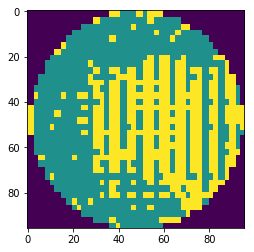

In [20]:
plt.imshow(valid_x[0][:,:,0])

## Строим модель 

In [21]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import np_utils

### VGG-16 

In [22]:
class SmallerVGGNet:
    @staticmethod
    def build(width, height, depth, classes, finalAct="softmax"):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # CONV => RELU => POOL
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=(96, 96, 1)))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(0.25))
        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # use a *softmax* activation for single-label classification
        # and *sigmoid* activation for multi-label classification
        model.add(Dense(classes))
        model.add(Activation(finalAct))

        # return the constructed network architecture
        return model


In [23]:
model = SmallerVGGNet.build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
                            depth=IMAGE_DIMS[2], classes=8, 
                            finalAct="sigmoid")
 
# initialize the optimizer
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
__________

In [25]:
from keras.callbacks import Callback
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        
    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, dice_coef, acc, _ = self.model.evaluate(x, y, verbose=0)
        print('\n - Testing loss: {:.4f} - dice_coef: {:.4f} - acc: {:.4f}\n'.format(loss, dice_coef, acc))

In [26]:
import keras.backend as K
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="C:\\Users\\user\\Python_Code\\Data Monsters\\output\\models\\VGG16_easy_weights.h5"

checkpoint = ModelCheckpoint(weight_path, monitor='val_dice_coef', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only=True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_dice_coef', factor=0.33,
                                   patience=1, verbose=1, mode='max',
                                   min_delta=0.0001, cooldown=0, min_lr=1e-8)

early = EarlyStopping(monitor="val_dice_coef", mode="max", verbose=2, 
                      patience=5)



callbacks_list = [checkpoint, reduceLROnPlat]

In [38]:
gen_train = make_image_gen(train)
gen_valid = make_image_gen(validate)

model.compile(optimizer=Adam(1e-4, decay=1e-6), 
              loss="binary_crossentropy",
              metrics=["accuracy"])


net = model.fit_generator(gen_train,
                          steps_per_epoch = 100,
                          epochs = EPOCHS,
                          validation_data = gen_valid,
                          validation_steps = 10,
                          callbacks = callbacks_list,
                          verbose = 1)

Epoch 1/75


AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [34]:
# Сохраним веса модели
model.save_weights(weight_path)

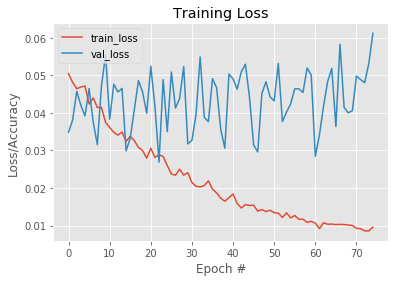

In [35]:
# plot the training loss
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), net.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), net.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left");

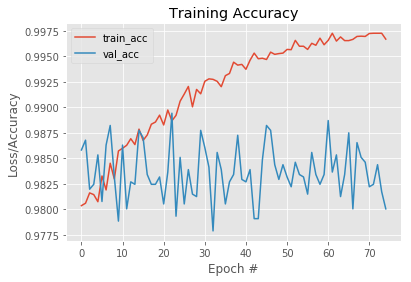

In [36]:
# plot the trainingaccuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), net.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), net.history["val_acc"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left");

In [150]:
%%time
for i in range(10000):
    test = cv2.resize(df_withpattern.waferMap[i], dsize=(IMAGE_DIMS[0], IMAGE_DIMS[1]), interpolation=cv2.INTER_NEAREST) 
    test = test.reshape(1, 96, 96, 1)

    proba = model.predict(test)[0]
    idxs = np.argsort(proba)[::-1][:2]

Wall time: 45.9 s


In [124]:
proba

array([2.1355986e-04, 6.8613786e-05, 9.9899143e-01, 1.7308802e-04,
       4.5226794e-03, 4.4081418e-04, 7.6980768e-06, 7.5941680e-05],
      dtype=float32)

1 img: ~4ms

1000 img: ~4.54s

10000 img: ~45.9s

In [43]:
out_map = []
out_class = []
for index, row in test.iterrows():
    out_map += [np.expand_dims(row.waferMap, -1)]
    out_class += [row.failureNum]

out_map = np.array(out_map)
out_map = out_map.reshape(out_map.shape[0], 96, 96, 1)
out_map = np.stack(out_map, 0)
out_class = np.array(np_utils.to_categorical(out_class, num_classes=8))

(4000, 96, 96, 1)

In [45]:
y_test_pred = model.predict(out_map)
y_test = out_class

In [46]:
y_test_pred.shape, y_test.shape

((4000, 8), (4000, 8))

In [47]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

Confusion matrix, without normalization
Normalized confusion matrix


C:\Users\user\Anaconda3\envs\neuralnets\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


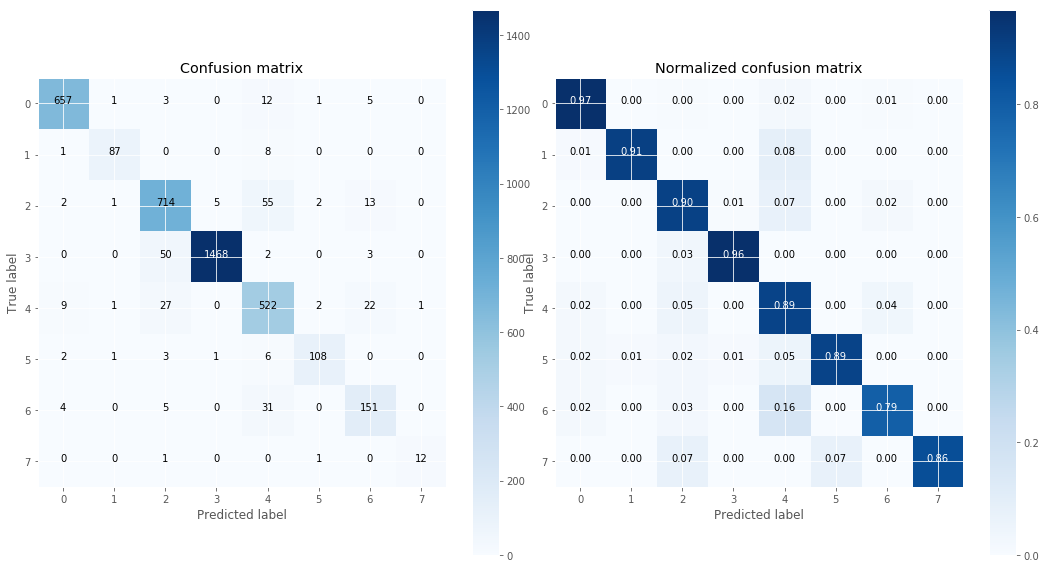

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
np.set_printoptions(precision=2)

from matplotlib import gridspec
fig = plt.figure(figsize=(15, 8)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 

## Plot non-normalized confusion matrix
plt.subplot(gs[0])
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(gs[1])
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show()